Data Glacier Summer 2022 Virtual Internship

G2M Cab Investment Analysis

Hypotheses:
1. Is there a preference for gender?
2. Do consumers prefer one company more than others?
3. What area are cabs most popular?
4. Is there seasonality in demand for cabs?
5. Is there a difference in demand by age?




In [2]:
#Importing data sets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cabDF = pd.read_csv('DataSets\Cab_Data.csv')
cityDF = pd.read_csv('DataSets\City.csv')
customerDF = pd.read_csv('Datasets\Customer_ID.csv')
transactionDF = pd.read_csv('DataSets\Transaction_ID.csv')

In [3]:
from datetime import datetime, timedelta, date

def dateFormat(n):
    originDate = datetime(1899,12,30)
    formatDate = originDate + pd.Timedelta(days = n)
    return formatDate

print(dateFormat(42377))


2016-01-08 00:00:00


In [4]:
cabDF['Date of Travel']= cabDF['Date of Travel'].apply(lambda x:dateFormat(x))
cabDF=cabDF.sort_values(by=['Date of Travel'])
cabDF=cabDF.reset_index(drop= True )

cabDF.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10001340,2016-01-02,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640
1,10000640,2016-01-02,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640
2,10000635,2016-01-02,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752
3,10001001,2016-01-02,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960
4,10000171,2016-01-02,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840
5,10001009,2016-01-02,Yellow Cab,PHOENIX AZ,30.00,1000.52,403.2000
6,10000605,2016-01-02,Yellow Cab,CHICAGO IL,35.52,760.86,430.5024
7,10001014,2016-01-02,Yellow Cab,SACRAMENTO CA,38.00,1065.42,547.2000
8,10000600,2016-01-02,Yellow Cab,CHICAGO IL,23.75,531.25,336.3000
9,10000182,2016-01-02,Pink Cab,SAN DIEGO CA,2.36,47.89,23.6000


In [5]:
print('Cab DF')
print(cabDF.describe(include='all'))
print(cabDF.info())
cabDF = cabDF.sort_values(by = ['Date of Travel'])

Cab DF
        Transaction ID       Date of Travel     Company         City  \
count     3.593920e+05               359392      359392       359392   
unique             NaN                 1095           2           19   
top                NaN  2018-01-05 00:00:00  Yellow Cab  NEW YORK NY   
freq               NaN                 2022      274681        99885   
first              NaN  2016-01-02 00:00:00         NaN          NaN   
last               NaN  2018-12-31 00:00:00         NaN          NaN   
mean      1.022076e+07                  NaN         NaN          NaN   
std       1.268058e+05                  NaN         NaN          NaN   
min       1.000001e+07                  NaN         NaN          NaN   
25%       1.011081e+07                  NaN         NaN          NaN   
50%       1.022104e+07                  NaN         NaN          NaN   
75%       1.033094e+07                  NaN         NaN          NaN   
max       1.044011e+07                  NaN         NaN  

In [6]:
print('City Data')
cityDF.describe(include= 'all')
print(cityDF.info())
cityDF.head()



City Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
None


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [7]:
print('Customer Data')
print(customerDF.describe())
print(customerDF.info())

Customer Data
        Customer ID           Age  Income (USD/Month)
count  49171.000000  49171.000000        49171.000000
mean   28398.252283     35.363121        15015.631856
std    17714.137333     12.599066         8002.208253
min        1.000000     18.000000         2000.000000
25%    12654.500000     25.000000         8289.500000
50%    27631.000000     33.000000        14656.000000
75%    43284.500000     42.000000        21035.000000
max    60000.000000     65.000000        35000.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [8]:
print('Transaction Data')
print(transactionDF.describe())
print(transactionDF.info())

Transaction Data
       Transaction ID    Customer ID
count    4.400980e+05  440098.000000
mean     1.022006e+07   23619.513120
std      1.270455e+05   21195.549816
min      1.000001e+07       1.000000
25%      1.011004e+07    3530.000000
50%      1.022006e+07   15168.000000
75%      1.033008e+07   43884.000000
max      1.044011e+07   60000.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB
None


Main Data Set

Merge data sets into one to have easier access to all the data

In [9]:
mainDF = cabDF.merge(transactionDF, on = 'Transaction ID').merge(customerDF, on = 'Customer ID').merge(cityDF, on = 'City')

mainDF = mainDF.sort_values(by= 'Date of Travel')
mainDF.describe(include='all')

    

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
count,3.593920e+05,359392,359392,359392,359392.000000,359392.000000,359392.000000,359392.000000,359392,359392,359392.000000,359392.000000,359392,359392
unique,NaN,1095,2,19,NaN,NaN,NaN,NaN,2,2,NaN,NaN,19,19
top,NaN,2018-01-05 00:00:00,Yellow Cab,NEW YORK NY,NaN,NaN,NaN,NaN,Card,Male,NaN,NaN,"8,405,837","302,149"
freq,NaN,2022,274681,99885,NaN,NaN,NaN,NaN,215504,205912,NaN,NaN,99885,99885
first,NaN,2016-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.022076e+07,NaN,NaN,NaN,22.567254,423.443311,286.190113,19191.652115,NaN,NaN,35.336705,15048.822937,NaN,NaN
std,1.268058e+05,NaN,NaN,NaN,12.233526,274.378911,157.993661,21012.412463,NaN,NaN,12.594234,7969.409482,NaN,NaN
min,1.000001e+07,NaN,NaN,NaN,1.900000,15.600000,19.000000,1.000000,NaN,NaN,18.000000,2000.000000,NaN,NaN
25%,1.011081e+07,NaN,NaN,NaN,12.000000,206.437500,151.200000,2705.000000,NaN,NaN,25.000000,8424.000000,NaN,NaN


KM Travelled Distribution

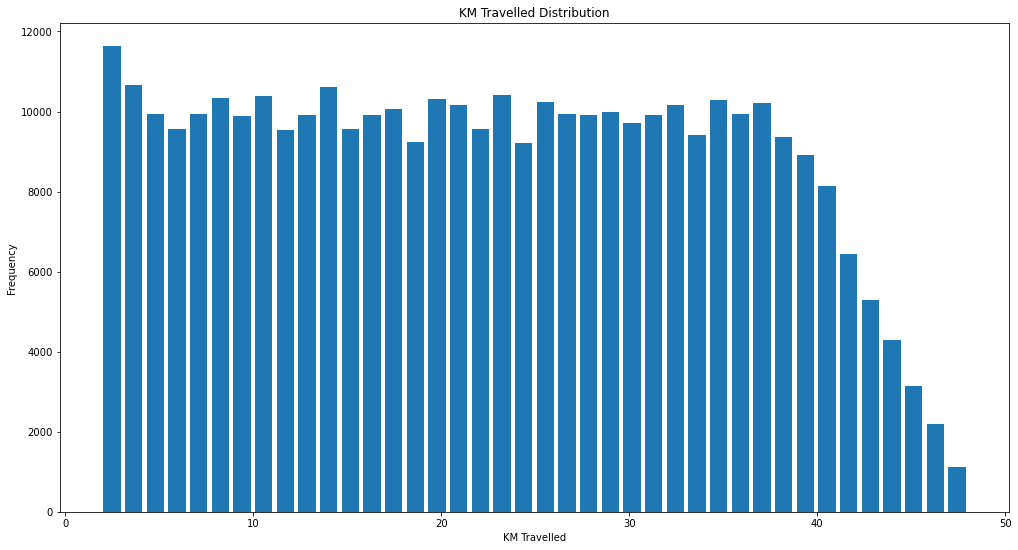

In [10]:
plt.figure(figsize=(17,9))
x = mainDF['KM Travelled']
plt.hist(x,bins = 40, rwidth= 0.8)
plt.xlabel('KM Travelled')
plt.ylabel('Frequency')
plt.title('KM Travelled Distribution')
plt.show()

Price Charged Distribution

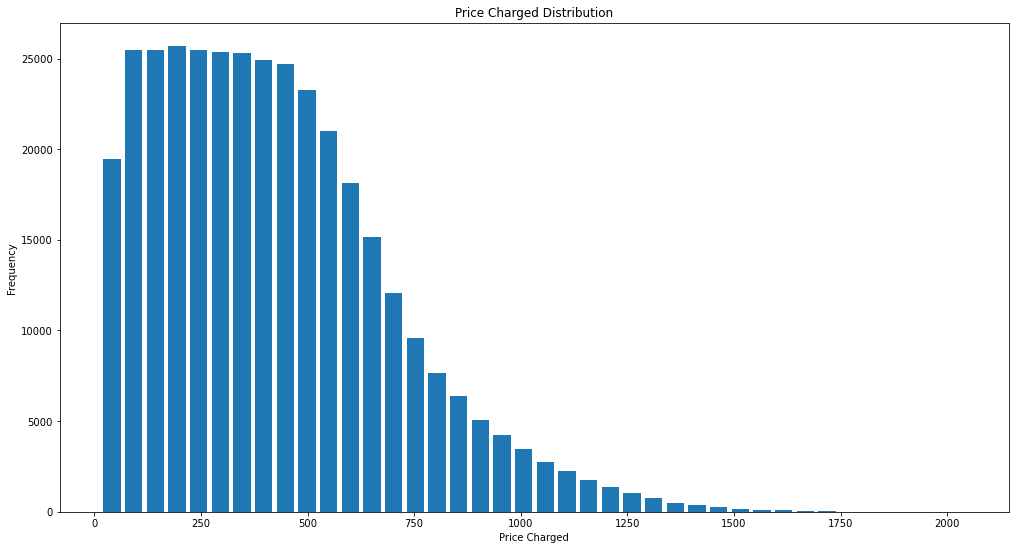

In [11]:
plt.figure(figsize=(17,9))
x = mainDF['Price Charged']
plt.hist(x,bins = 40, rwidth= 0.8)
plt.xlabel('Price Charged')
plt.ylabel('Frequency')
plt.title('Price Charged Distribution')
plt.show()

Income Distribution

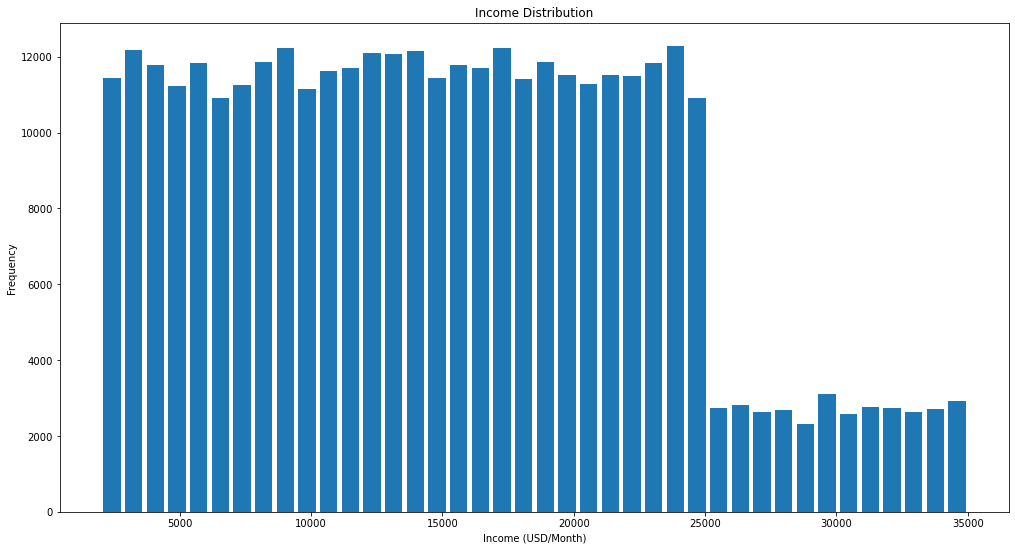

In [12]:
plt.figure(figsize=(17,9))
x = mainDF['Income (USD/Month)']
plt.hist(x,bins = 40, rwidth= 0.8)
plt.xlabel('Income (USD/Month)')
plt.ylabel('Frequency')
plt.title('Income Distribution')
plt.show()

Age Distribution

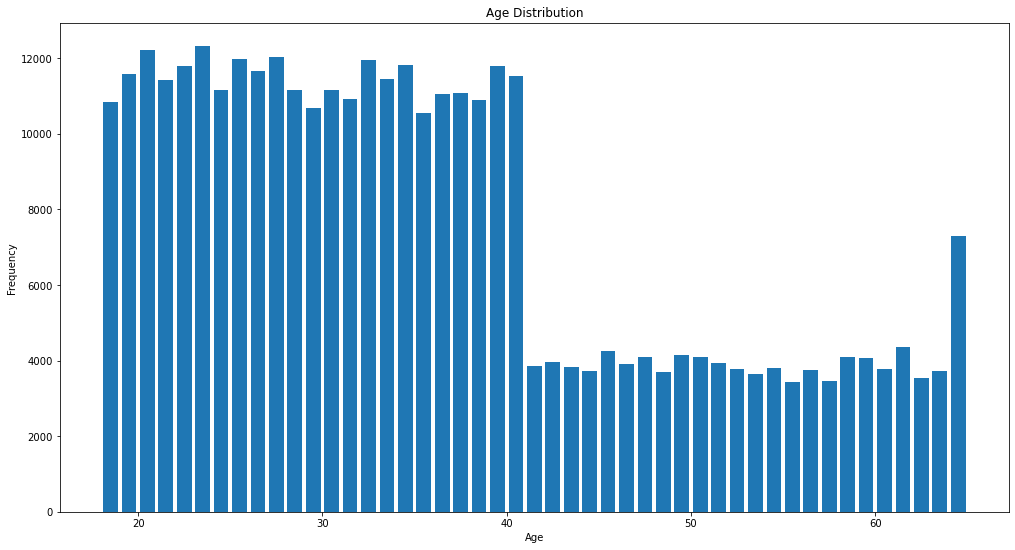

In [13]:
plt.figure(figsize=(17,9))
x = mainDF['Age']
plt.hist(x,bins = 47, rwidth= 0.8) #Bin number = range of ages
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

Type of Payment

[215504, 143888]


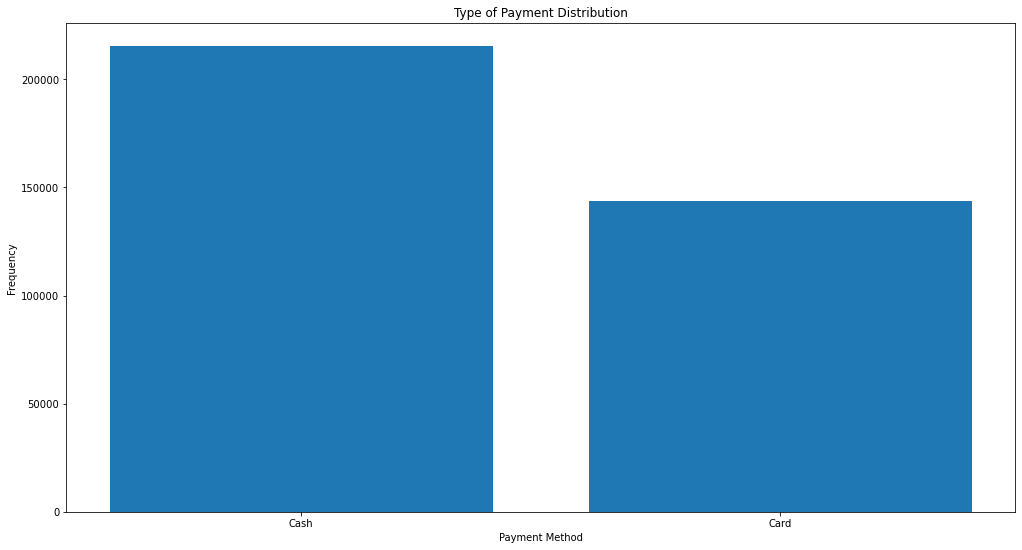

In [14]:
plt.figure(figsize=(17,9))
xSer = mainDF['Payment_Mode'].value_counts()
count = xSer.tolist()
print(count)
modes = ['Cash','Card']
plt.bar(modes,count)
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.title('Type of Payment Distribution') 
plt.show()


Gender Distribution

Male      205912
Female    153480
Name: Gender, dtype: int64
[205912, 153480]


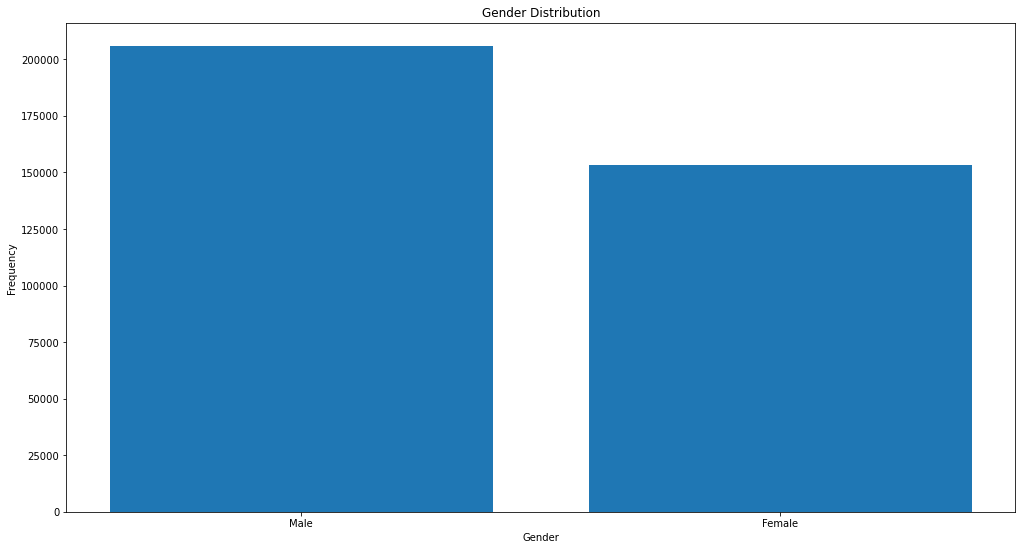

In [15]:
plt.figure(figsize=(17,9))
xSer = mainDF['Gender'].value_counts()
print(xSer)
count = xSer.tolist()
print(count)
modes = ['Male','Female']
plt.bar(modes,count)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender Distribution') 
plt.show()

Number of Customers per Company

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64
[274681, 84711]


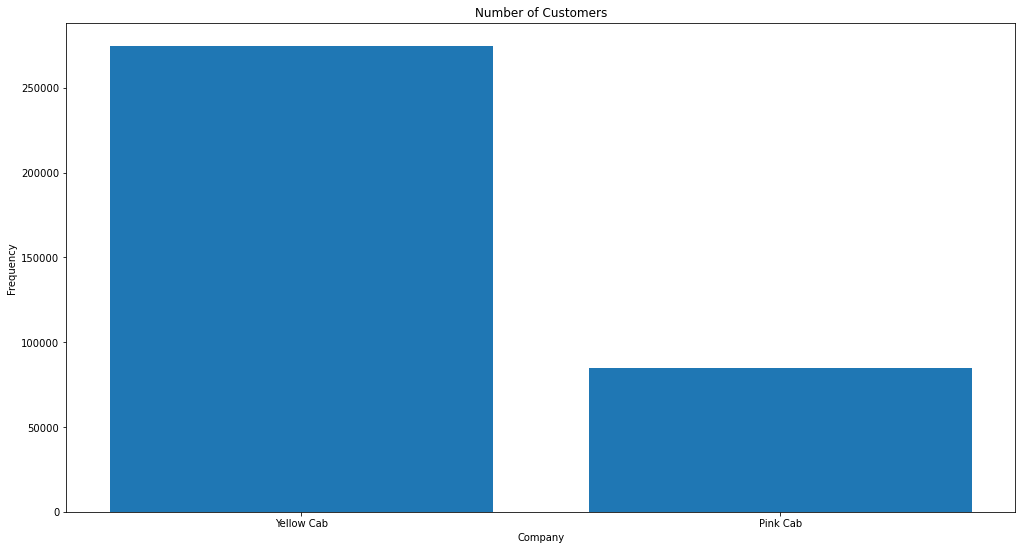

In [16]:
plt.figure(figsize=(17,9))
xSer = mainDF['Company'].value_counts()
print(xSer)
count = xSer.tolist()
print(count)
companies = ['Yellow Cab','Pink Cab']
plt.bar(companies,count)
plt.xlabel('Company')
plt.ylabel('Frequency')
plt.title('Number of Customers') 
plt.show()

KM Travelled vs. Cost

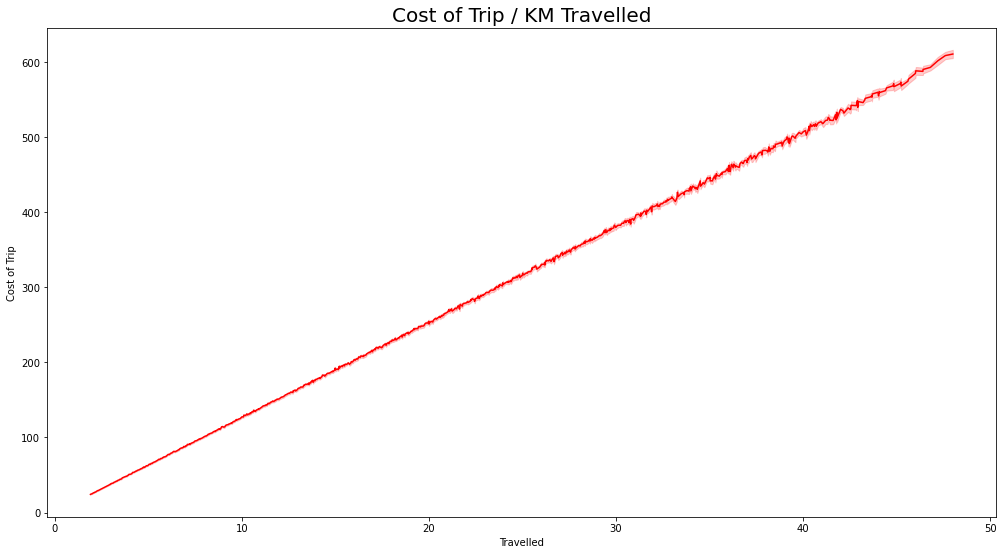

In [17]:
plt.figure(figsize=(17,9))
sns.lineplot(data=mainDF, x="KM Travelled",y='Cost of Trip', color= 'red')
plt.title('Cost of Trip / KM Travelled', fontsize=20)
plt.xlabel('Travelled')
plt.ylabel('Cost of Trip')
plt.show()

Individual Firm Data Frames

First will Break up dates into day/month/year columns so we can reference individually to be able to look into annual and monthly analysis

In [18]:
mainDF['Year'] = mainDF['Date of Travel'].dt.year
mainDF['Month'] = mainDF['Date of Travel'].dt.month
mainDF['Day'] = mainDF['Date of Travel'].dt.day
mainDF['Profit'] = mainDF['Price Charged'] - mainDF['Cost of Trip']


In [19]:
yellowCab = mainDF[mainDF['Company'] == 'Yellow Cab']
yellowCab.head()


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Year,Month,Day,Profit
0,10001340,2016-01-02,Yellow Cab,WASHINGTON DC,10.20,202.54,135.864,52536,Card,Male,24,10606,"418,859","127,001",2016,1,2,66.676
143772,10000707,2016-01-02,Yellow Cab,LOS ANGELES CA,19.19,534.92,253.308,6167,Card,Male,37,13588,"1,595,037","144,132",2016,1,2,281.612
143758,10000709,2016-01-02,Yellow Cab,LOS ANGELES CA,38.61,1016.46,509.652,6539,Card,Male,38,6978,"1,595,037","144,132",2016,1,2,506.808
143747,10000743,2016-01-02,Yellow Cab,LOS ANGELES CA,4.56,113.97,62.928,8702,Card,Male,20,3795,"1,595,037","144,132",2016,1,2,51.042
216,10001311,2016-01-02,Yellow Cab,WASHINGTON DC,34.65,707.94,474.012,53048,Card,Male,23,31566,"418,859","127,001",2016,1,2,233.928


In [20]:
pinkCab = mainDF[mainDF['Company'] == 'Pink Cab']

pinkCab.describe(include='all')

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Year,Month,Day,Profit
count,8.471100e+04,84711,84711,84711,84711.000000,84711.000000,84711.000000,84711.000000,84711,84711,84711.000000,84711.000000,84711,84711,84711.000000,84711.000000,84711.000000,84711.000000
unique,NaN,1095,1,19,NaN,NaN,NaN,NaN,2,2,NaN,NaN,19,19,NaN,NaN,NaN,NaN
top,NaN,2018-01-05 00:00:00,Pink Cab,LOS ANGELES CA,NaN,NaN,NaN,NaN,Card,Male,NaN,NaN,"1,595,037","144,132",NaN,NaN,NaN,NaN
freq,NaN,528,84711,19865,NaN,NaN,NaN,NaN,50719,47231,NaN,NaN,19865,19865,NaN,NaN,NaN,NaN
first,NaN,2016-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.022394e+07,NaN,NaN,NaN,22.559917,310.800856,248.148682,18422.581577,NaN,NaN,35.322414,15059.047137,NaN,NaN,2017.049934,7.808490,15.623650,62.652174
std,1.261782e+05,NaN,NaN,NaN,12.231092,181.995661,135.403345,18084.830799,NaN,NaN,12.644780,7991.077762,NaN,NaN,0.799737,3.345176,8.817676,77.590378
min,1.000001e+07,NaN,NaN,NaN,1.900000,15.600000,19.000000,1.000000,NaN,NaN,18.000000,2000.000000,NaN,NaN,2016.000000,1.000000,1.000000,-220.060000
25%,1.011014e+07,NaN,NaN,NaN,12.000000,159.970000,131.868000,5317.500000,NaN,NaN,25.000000,8371.000000,NaN,NaN,2016.000000,5.000000,8.000000,11.206000


Yearly Profits

In [21]:
yearProfitDF = mainDF.groupby(['Company','Year']).Profit.sum().to_frame('Yearly Profit')
pcYearly = yearProfitDF.loc['Pink Cab']
ycYearly = yearProfitDF.loc['Yellow Cab']

Monthly Profits

In [22]:
monthlyProfitDF = mainDF.groupby(['Company','Year','Month']).Profit.sum().to_frame('Monthly Profit')
pcMonthly = monthlyProfitDF.loc['Pink Cab']
ycMonthly = monthlyProfitDF.loc['Yellow Cab']




Profit Analysis

In [23]:
pcMonthly.reset_index(['Month','Year'])

,Year,Month,Monthly Profit
0,2016,1,73952.863
1,2016,2,87475.544
2,2016,3,87801.183
3,2016,4,82591.853
4,2016,5,61550.958
5,2016,6,71103.252
6,2016,7,105912.738
7,2016,8,131573.364
8,2016,9,143889.421
9,2016,10,240114.858


Text(0.5, 0, 'Date')

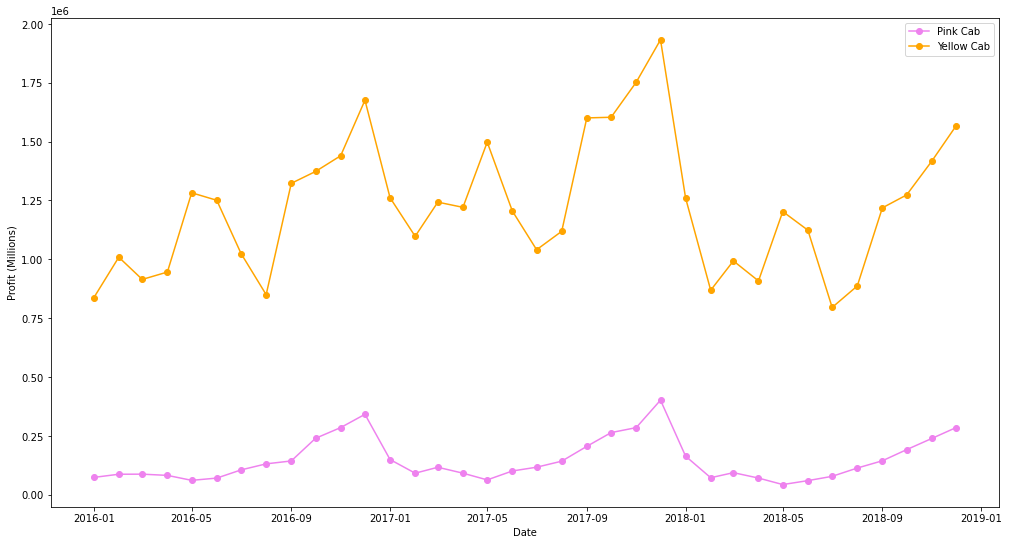

In [60]:
plt.figure(figsize=(17,9))
date = [datetime(2016,1,1),datetime(2016,2,1),datetime(2016,3,1),datetime(2016,4,1),datetime(2016,5,1),datetime(2016,6,1),datetime(2016,7,1),datetime(2016,8,1),datetime(2016,9,1),datetime(2016,10,1),datetime(2016,11,1),datetime(2016,12,1),
        datetime(2017,1,1),datetime(2017,2,1),datetime(2017,3,1),datetime(2017,4,1),datetime(2017,5,1),datetime(2017,6,1),datetime(2017,7,1),datetime(2017,8,1),datetime(2017,9,1),datetime(2017,10,1),datetime(2017,11,1),datetime(2017,12,1),
        datetime(2018,1,1),datetime(2018,2,1),datetime(2018,3,1),datetime(2018,4,1),datetime(2018,5,1),datetime(2018,6,1),datetime(2018,7,1),datetime(2018,8,1),datetime(2018,9,1),datetime(2018,10,1),datetime(2018,11,1),datetime(2018,12,1)
]

plt.plot(date,pcMonthly['Monthly Profit'].tolist(),color = 'violet',label = 'Pink Cab',marker = 'o')
plt.plot(date,ycMonthly['Monthly Profit'].tolist(),color = 'orange', label = 'Yellow Cab', marker = 'o')
plt.legend(loc = 'best')
plt.ylabel('Profit (Millions)')
plt.xlabel('Date')


In [41]:
pcMonthYear = pcMonthly.reset_index(['Month','Year'])
pc2016 = pcMonthYear[pcMonthYear['Year'].isin([2016])]
pc2017 = pcMonthYear[pcMonthYear['Year'].isin([2017])]
pc2018 = pcMonthYear[pcMonthYear['Year'].isin([2018])]

pc2016

,Year,Month,Monthly Profit
0,2016,1,73952.863
1,2016,2,87475.544
2,2016,3,87801.183
3,2016,4,82591.853
4,2016,5,61550.958
5,2016,6,71103.252
6,2016,7,105912.738
7,2016,8,131573.364
8,2016,9,143889.421
9,2016,10,240114.858


Pink Cab Monthly Analysis

Text(0.5, 1.0, 'Pink Cab Monthly Profits')

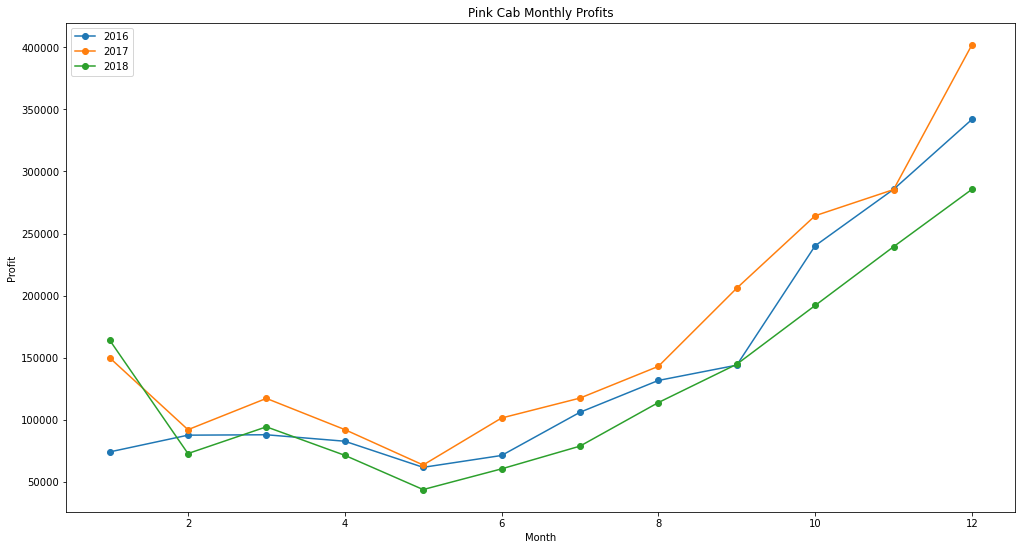

In [58]:
plt.figure(figsize=(17,9))
dates = (pc2016['Month'])
plt.plot(dates,pc2016['Monthly Profit'], label = '2016',marker = 'o')
plt.plot(dates,pc2017['Monthly Profit'],label = '2017',marker = 'o')
plt.plot(dates,pc2018['Monthly Profit'],label = '2018',marker = 'o')
plt.legend(loc ='best')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Pink Cab Monthly Profits')

In [53]:
ycMonthYear = ycMonthly.reset_index(['Month','Year'])
yc2016 = ycMonthYear[ycMonthYear['Year'].isin([2016])]
yc2017 = ycMonthYear[ycMonthYear['Year'].isin([2017])]
yc2018 = ycMonthYear[ycMonthYear['Year'].isin([2018])]

yc2016

,Year,Month,Monthly Profit
0,2016,1,8.363081e+05
1,2016,2,1.009169e+06
2,2016,3,9.147648e+05
3,2016,4,9.461364e+05
4,2016,5,1.282773e+06
5,2016,6,1.250892e+06
6,2016,7,1.024755e+06
7,2016,8,8.501200e+05
8,2016,9,1.322873e+06
9,2016,10,1.373259e+06


Text(0.5, 1.0, 'Yellow Cab Monthly Profits')

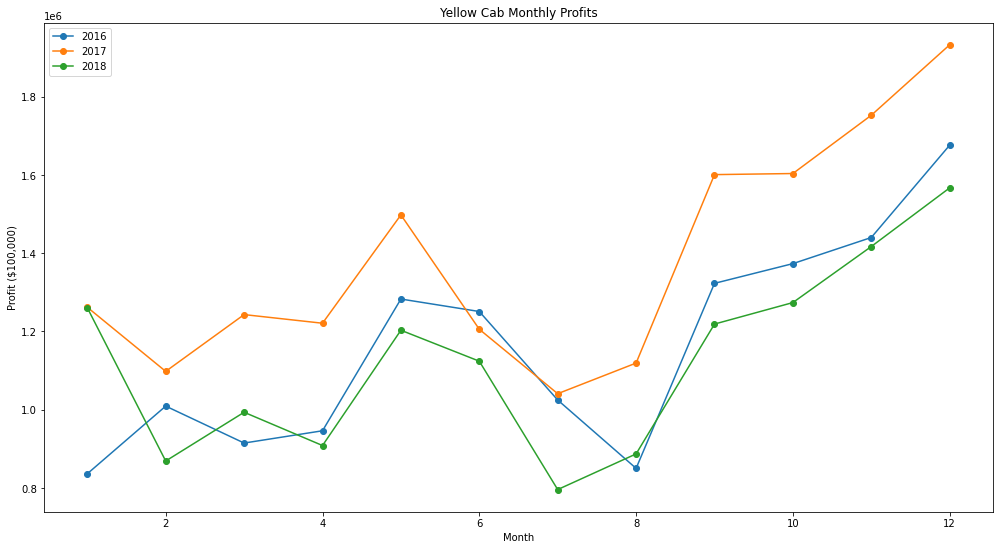

In [59]:
plt.figure(figsize=(17,9))
dates = (yc2016['Month'])
plt.plot(dates,yc2016['Monthly Profit'], label = '2016',marker = 'o')
plt.plot(dates,yc2017['Monthly Profit'],label = '2017',marker = 'o')
plt.plot(dates,yc2018['Monthly Profit'],label = '2018',marker = 'o')
plt.legend(loc ='best')
plt.xlabel('Month')
plt.ylabel('Profit ($100,000)')
plt.title('Yellow Cab Monthly Profits')

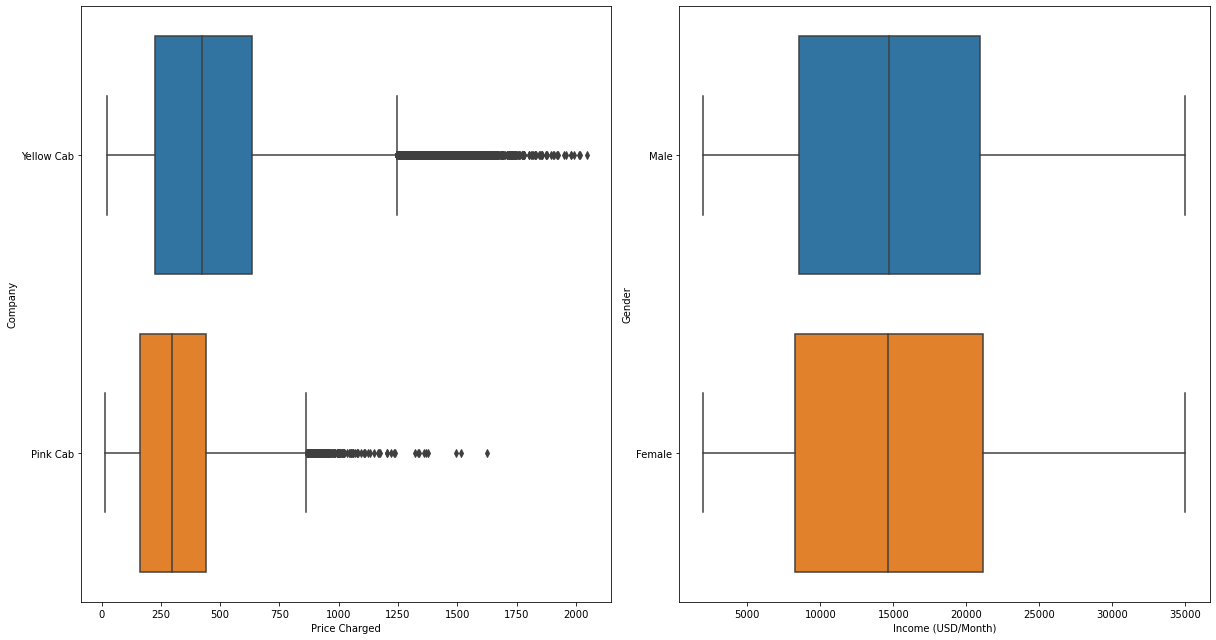

In [62]:
plt.figure(figsize=(17,9))

plt.subplot(1,2,1)
sns.boxplot(data = mainDF, y = 'Company', x = "Price Charged", dodge=False)

plt.subplot(1,2,2)
sns.boxplot(data = mainDF, y = 'Gender', x = "Income (USD/Month)", dodge=False)

plt.tight_layout()
plt.show()

Company Performance by Area

Text(0.5, 1.0, 'Yellow Cab Profits per City')

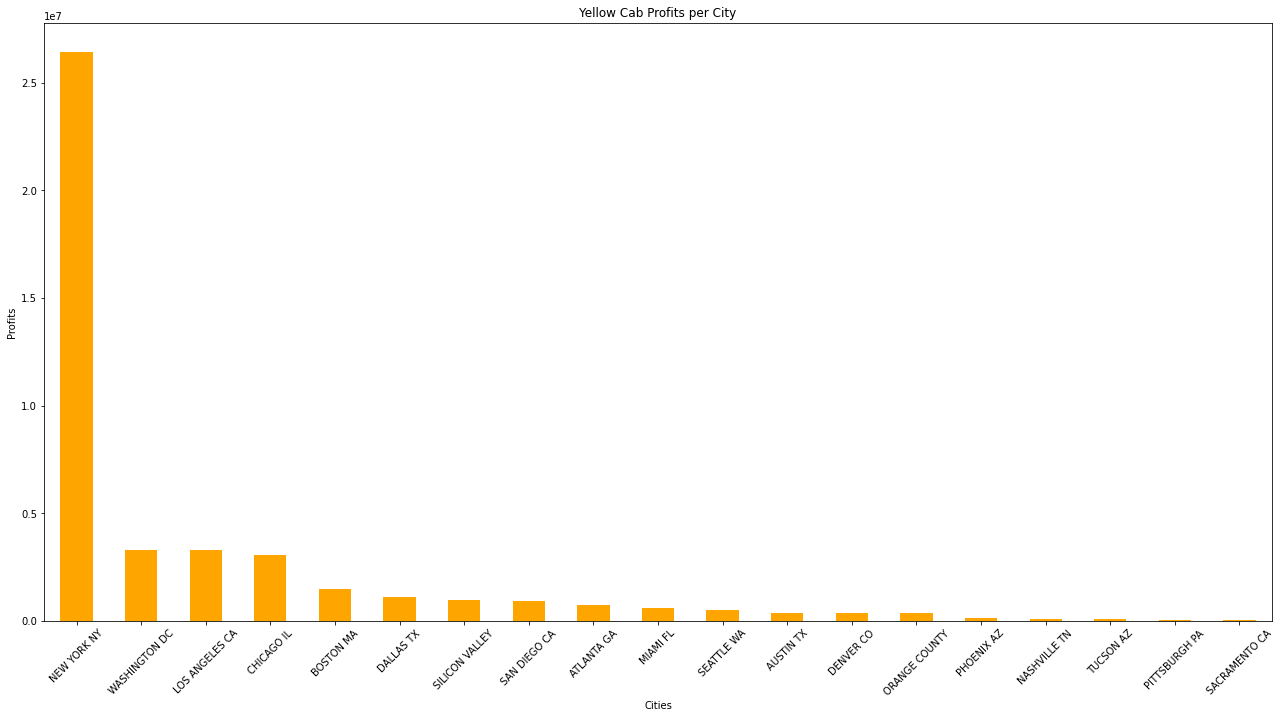

In [72]:
ycCityProfits= yellowCab.groupby('City').Profit.sum()
ycCityProfits= pd.DataFrame(ycCityProfits)
ycCityProfits = ycCityProfits.sort_values(by='Profit', ascending= False )
ycCityProfits.head()

plt.figure(figsize=(22,11))
fig= ycCityProfits.Profit.plot.bar(color = 'orange')
plt.xticks(rotation=45)

plt.ylabel('Profits')
plt.xlabel('Cities')
plt.title('Yellow Cab Profits per City')


Text(0.5, 1.0, 'Pink Cab Profits per City')

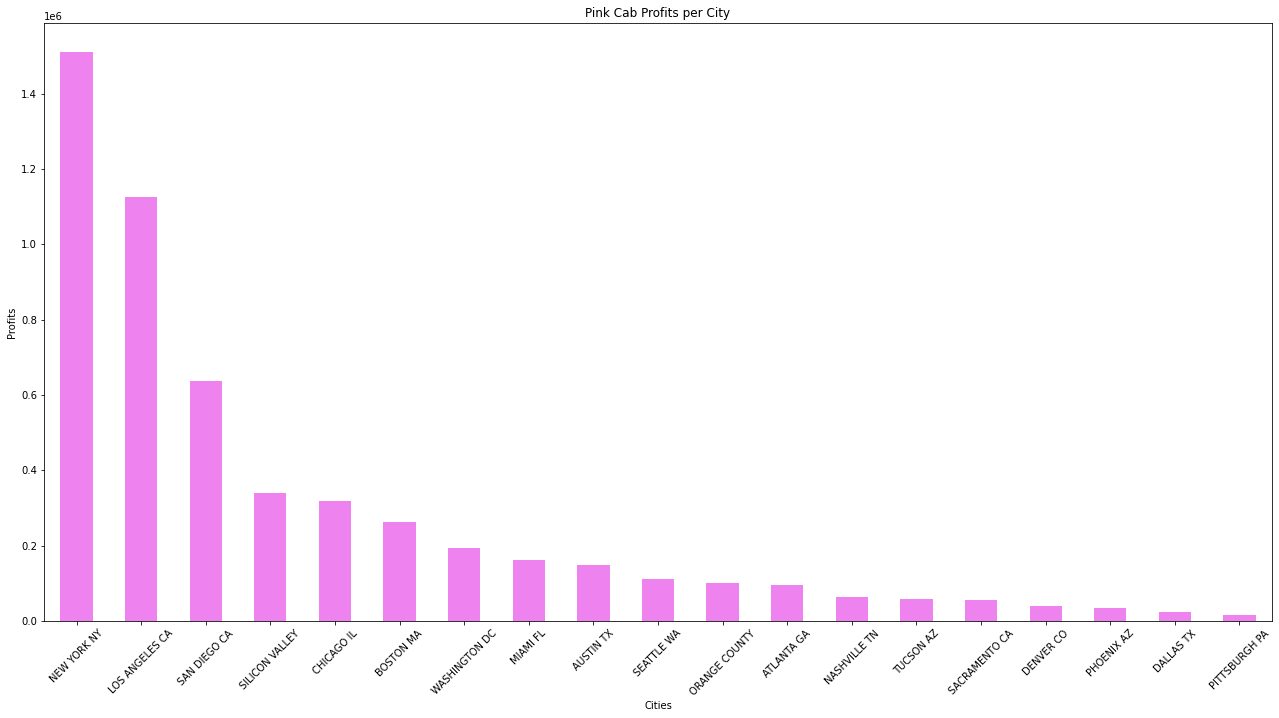

In [73]:
pinkProfitsCity= pinkCab.groupby('City').Profit.sum()
pinkProfitsCity= pd.DataFrame(pinkProfitsCity)
pinkProfitsCity = pinkProfitsCity.sort_values(by='Profit', ascending= False )
pinkProfitsCity.head()

plt.figure(figsize=(22,11))
fig= pinkProfitsCity.Profit.plot.bar(color = 'violet')
plt.xticks(rotation=45)

plt.ylabel('Profits')
plt.xlabel('Cities')
plt.title('Pink Cab Profits per City')

Conclusion

1. Is there a preference for gender?

We see that there are more male users that use the cab companies overall.

2. Do consumers prefer one company more than others?

We see that there are more users of Yellow Cab compared to Pink Cab.

3. What area are cabs most popular?

Both companies see the most demand in New York.

4. Is there seasonality in demand for cabs?

For Yellow Cab, we see a spike in profits during the months after August, and a high during May. Compared to Pink cab, we see that there is an upward trend in profits beginning from the month of May.

5. Is there a difference in demand by age?


50% of the users are under the age of 33 which shows that the use of these companies do appeal to a younger age group of people.
